In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Investigate dataset on a small subset

In [2]:
df = pd.read_csv("reviews/reviews.csv", nrows=3000000)

C:\Users\nazar\AppData\Local\Temp\ipykernel_8612\1754176946.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reviews/reviews.csv", nrows=3000000)


In [5]:
# pd.save_csv(df, "test/test.csv")
df.to_csv("test.csv", sep='\t')

In [4]:
df.describe()

,recommendationid,appid,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,timestamp_created,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
count,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,...,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,0.0
mean,7.149275e+07,4.284613e+05,7.656120e+16,140.788100,34.199978,2.509379e+04,58.055358,1.362901e+04,1.589635e+09,1.572306e+09,...,0.896616,2.546874,6.872028e+04,0.199924,0.115002,0.698902,0.044330,0.055398,0.155516,NaN
std,4.012266e+07,4.970987e+05,3.980355e+08,580.730873,235.140865,7.876660e+04,593.641326,4.613073e+04,2.472102e+08,8.555186e+07,...,0.304460,28.796301,1.717975e+07,0.260415,1.284042,0.458736,0.205827,0.228756,0.362396,NaN
min,1.240000e+02,1.000000e+01,7.656120e+16,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.287204e+09,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.140971e+07,1.000000e+01,7.656120e+16,0.000000,2.000000,2.910000e+02,0.000000,1.570000e+02,1.578012e+09,1.523417e+09,...,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,6.684324e+07,1.009000e+04,7.656120e+16,8.000000,5.000000,1.346000e+03,0.000000,5.740000e+02,1.643074e+09,1.586290e+09,...,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,1.035051e+08,1.006510e+06,7.656120e+16,102.000000,17.000000,1.094200e+04,0.000000,3.757000e+03,1.685597e+09,1.637786e+09,...,1.000000,1.000000,0.000000e+00,0.502762,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
max,1.494266e+08,1.016120e+06,7.656120e+16,30413.000000,10441.000000,5.839020e+06,20133.000000,2.864901e+06,1.699008e+09,1.699000e+09,...,1.000000,7796.000000,4.294967e+09,0.992070,293.000000,1.000000,1.000000,1.000000,1.000000,NaN


Helper functions

In [25]:
def find_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[dataframe[column] > upper_bound]
    return outliers, upper_bound

def find_outliers_threshold(dataframe, column, threshold):
    outliers = dataframe[dataframe[column] > threshold]
    return outliers

def print_outliers(dataframe, column, threshold, should_print_samples=False):
    iqr_samples, upper_bound = find_outliers_iqr(dataframe, column)
    samples = find_outliers_threshold(dataframe, column, threshold)

    print(f"Upper bound: {upper_bound}")
    print(f"Number of total samples: {len(dataframe[column])}")
    print(f"Number of Outliers via IQR: {len(iqr_samples)}")
    print(f"Number of Outliers over the threshold: {len(samples)}")
    
    if should_print_samples:
        print(samples.head())
        
    print("\n")

Rename columns

In [26]:
# Ids
COL_RECOMMENDATION_ID = "recommendation_id"
COL_APP_ID = "app_id"
COL_AUTHOR_STEAM_ID = "author_steam_id" 

# Game
COL_GAME_TITLE = "game_title"

# Author
COL_AUTHOR_NUM_GAMES = "author_num_games_owned"
COL_AUTHOR_NUM_REVIEWS = "author_num_reviews"
COL_AUTHOR_PLAYTIME_LIFETIME = "author_playtime_lifetime" # lifetime playtime tracked in game (originaly in minutes, later converted to hours)
COL_AUTHOR_PLAYTIME_LAST_TWO_WEEKS = "author_playtime_last_two_weeks" # playtime tracked in the past two weeks for this game (holds no useful information, will drop)
COL_AUTHOR_PLAYTIME_AT_REVIEW = "playtime_at_review" # playtime when the review was written (originaly in minutes, later converted to hours)
COL_AUTHOR_LAST_PLAYED = "author_last_played"

AUTHOR_COLUMNS = [COL_AUTHOR_NUM_GAMES, COL_AUTHOR_NUM_REVIEWS, COL_AUTHOR_PLAYTIME_LIFETIME, COL_AUTHOR_PLAYTIME_AT_REVIEW, COL_AUTHOR_LAST_PLAYED]

# Review details
COL_LANGUAGE = "language"
COL_REVIEW = "review" # review text
COL_CREATED_AT = "created_at"
COL_UPDATED_AT = "updated_at"
COL_IS_VOTED_UP = "is_voted_up" # if the review was positive or negative

REVIEW_DETAILS_COLUMNS = [COL_LANGUAGE, COL_REVIEW, COL_CREATED_AT, COL_UPDATED_AT, COL_IS_VOTED_UP]

# Players response to the review
COL_NUM_VOTES_UP = "num_votes_up" # number of people who voted the review up
COL_NUM_VOTES_FUNNY = "num_votes_funny" # number of people who voted the review funny
COL_WEIGHTED_VOTE_SCORE = "weighted_vote_score" # a helpfulness score (steam generated)
COL_NUM_COMMENTS = "num_comment" # number of comments to the review

PLAYERS_RESPONSE_COLUMNS = [COL_NUM_VOTES_UP, COL_NUM_VOTES_FUNNY, COL_WEIGHTED_VOTE_SCORE, COL_NUM_COMMENTS]

# Game state at a time of the review
COL_IS_PURCHASED = "is_purchased" # if the user purchased the game on Steam
COL_IS_RECEIVED_FOR_FREE = "is_received_for_free" # true if the user checked a box saying they got the app for free
COL_IS_WRITTEN_DURING_EARLY_ACCESS = "is_written_during_early_access" # if the user posted this review while the game was in Early Access

PURCHASE_STATE_COLUMNS = [COL_IS_PURCHASED, COL_IS_RECEIVED_FOR_FREE, COL_IS_WRITTEN_DURING_EARLY_ACCESS]

# Ching chong
COL_IS_HIDDEN_IN_CHINA = "is_hidden_in_china"
COL_CHINA_LOCATION = "china_location" # ??? no idea; only 1 in 0.5 million rows has a value, will delete

# Create a dictionary for renaming
rename_dict = {
    "recommendationid": COL_RECOMMENDATION_ID,
    "appid": COL_APP_ID,
    "game": COL_GAME_TITLE,
    "author_steamid": COL_AUTHOR_STEAM_ID,
    "author_num_games_owned": COL_AUTHOR_NUM_GAMES,
    "author_num_reviews": COL_AUTHOR_NUM_REVIEWS,
    "author_playtime_forever": COL_AUTHOR_PLAYTIME_LIFETIME,
    "author_playtime_last_two_weeks": COL_AUTHOR_PLAYTIME_LAST_TWO_WEEKS,
    "author_playtime_at_review": COL_AUTHOR_PLAYTIME_AT_REVIEW,
    "author_last_played": COL_AUTHOR_LAST_PLAYED,
    "language": COL_LANGUAGE,
    "review": COL_REVIEW,
    "timestamp_created": COL_CREATED_AT,
    "timestamp_updated": COL_UPDATED_AT,
    "voted_up": COL_IS_VOTED_UP,
    "votes_up": COL_NUM_VOTES_UP,
    "votes_funny": COL_NUM_VOTES_FUNNY,
    "weighted_vote_score": COL_WEIGHTED_VOTE_SCORE,
    "comment_count": COL_NUM_COMMENTS,
    "steam_purchase": COL_IS_PURCHASED,
    "received_for_free": COL_IS_RECEIVED_FOR_FREE,
    "written_during_early_access": COL_IS_WRITTEN_DURING_EARLY_ACCESS,
    "hidden_in_steam_china": COL_IS_HIDDEN_IN_CHINA,
    "steam_china_location": COL_CHINA_LOCATION,
}

df.rename(columns=rename_dict, inplace=True)

print("New Columns:")
print(df.columns)

New Columns:
Index(['recommendation_id', 'app_id', 'game_title', 'author_steam_id',
       'author_num_games_owned', 'author_num_reviews',
       'author_playtime_lifetime', 'author_playtime_last_two_weeks',
       'playtime_at_review', 'author_last_played', 'language', 'review',
       'created_at', 'updated_at', 'is_voted_up', 'num_votes_up',
       'num_votes_funny', 'weighted_vote_score', 'num_comment', 'is_purchased',
       'is_received_for_free', 'is_written_during_early_access',
       'is_hidden_in_china', 'china_location'],
      dtype='object')


Attribute Destruction

In [27]:
df.drop(columns=[COL_IS_HIDDEN_IN_CHINA, COL_CHINA_LOCATION, COL_AUTHOR_PLAYTIME_LAST_TWO_WEEKS], inplace=True)

print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   recommendation_id               500000 non-null  int64  
 1   app_id                          500000 non-null  int64  
 2   game_title                      500000 non-null  object 
 3   author_steam_id                 500000 non-null  int64  
 4   author_num_games_owned          500000 non-null  int64  
 5   author_num_reviews              500000 non-null  int64  
 6   author_playtime_lifetime        500000 non-null  int64  
 7   playtime_at_review              500000 non-null  int64  
 8   author_last_played              500000 non-null  int64  
 9   language                        500000 non-null  object 
 10  review                          499995 non-null  object 
 11  created_at                      500000 non-null  int64  


Data profiling (examining characteristics like data types, volumes, value ranges, relationships, irregularities, and duplicates)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   recommendation_id               500000 non-null  int64  
 1   app_id                          500000 non-null  int64  
 2   game_title                      500000 non-null  object 
 3   author_steam_id                 500000 non-null  int64  
 4   author_num_games_owned          500000 non-null  int64  
 5   author_num_reviews              500000 non-null  int64  
 6   author_playtime_lifetime        500000 non-null  int64  
 7   playtime_at_review              500000 non-null  int64  
 8   author_last_played              500000 non-null  int64  
 9   language                        500000 non-null  object 
 10  review                          499995 non-null  object 
 11  created_at                      500000 non-null  int64  


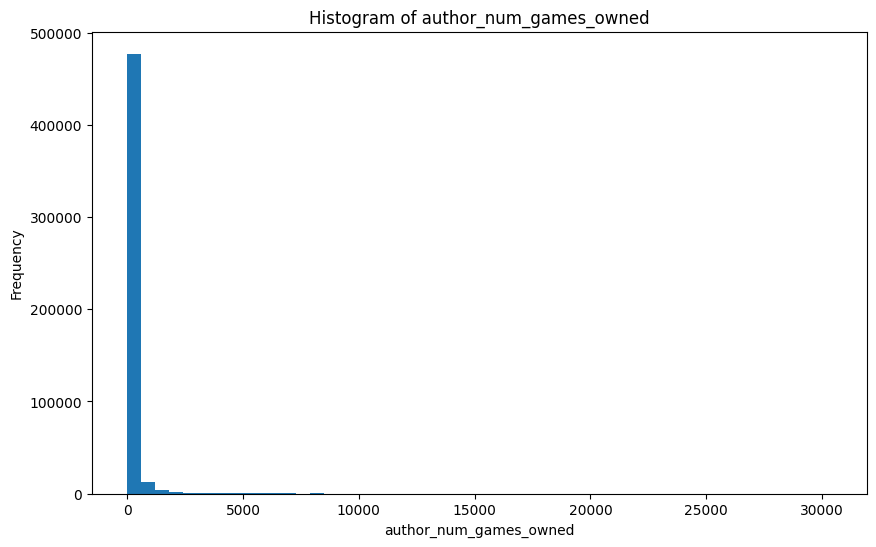

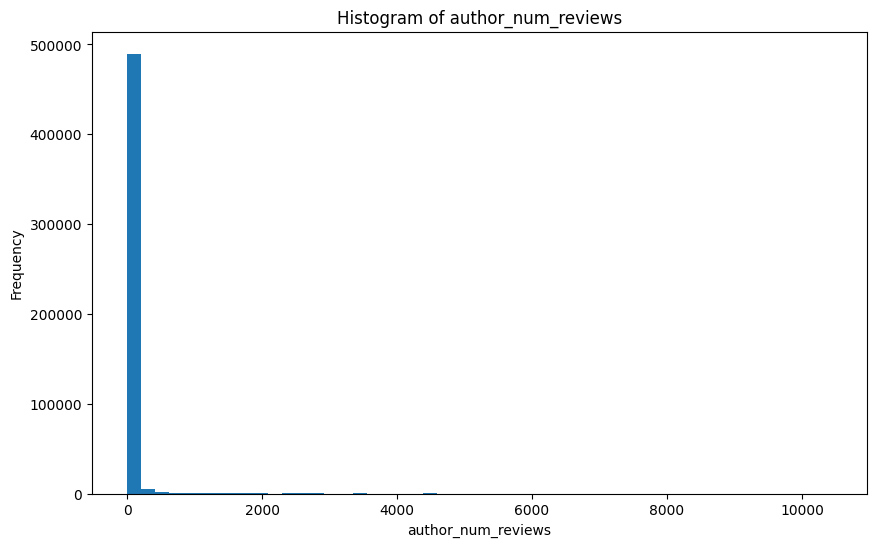

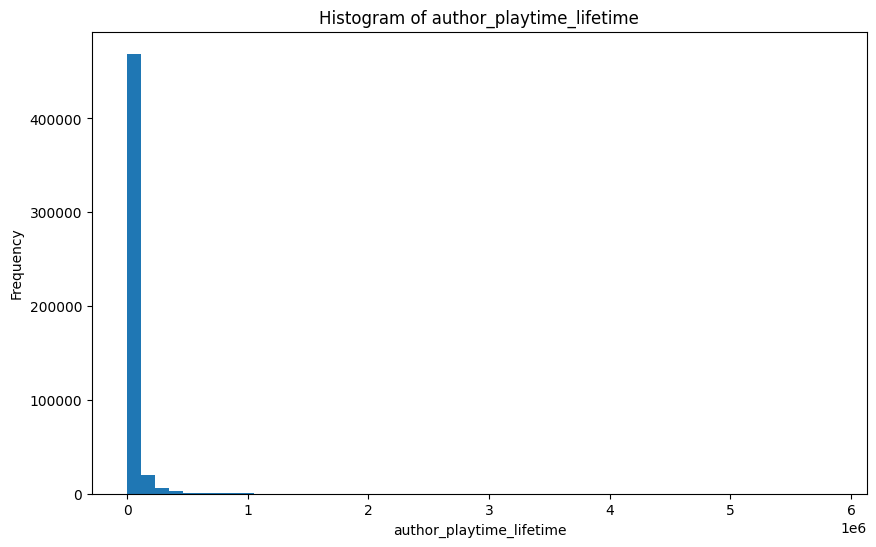

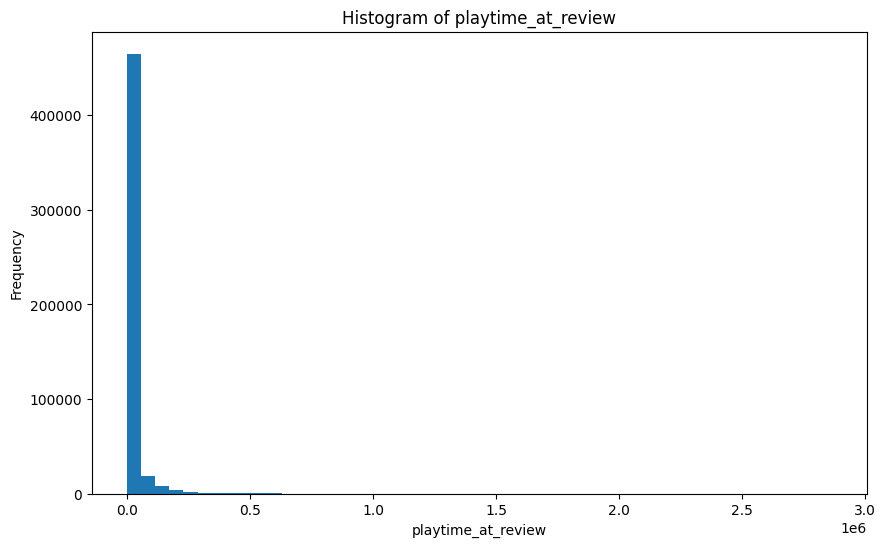

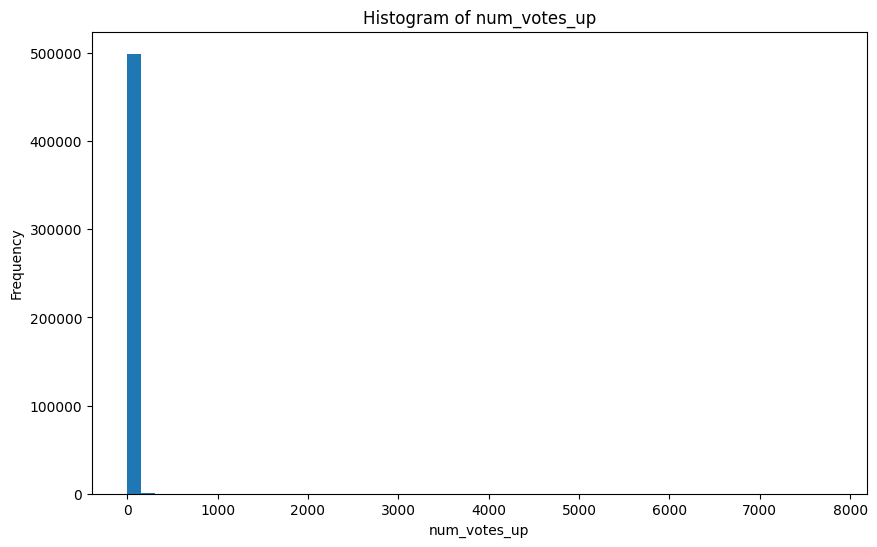

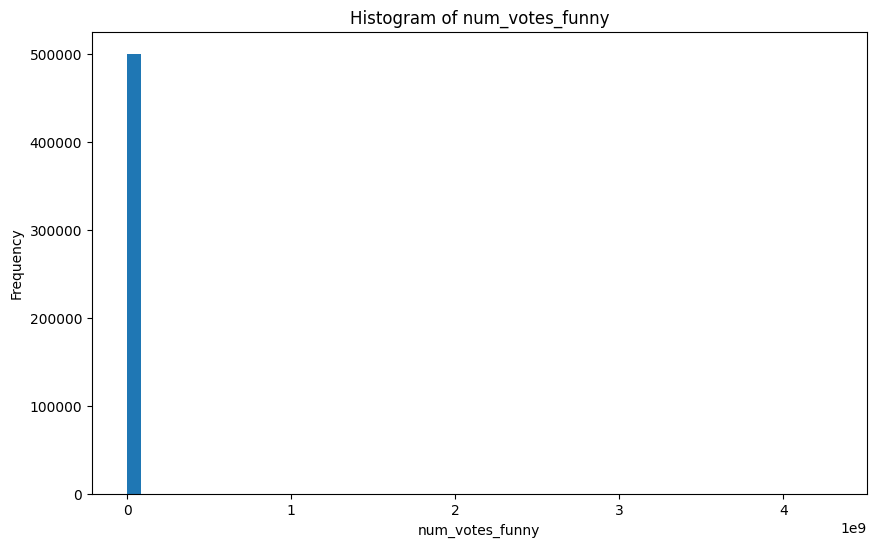

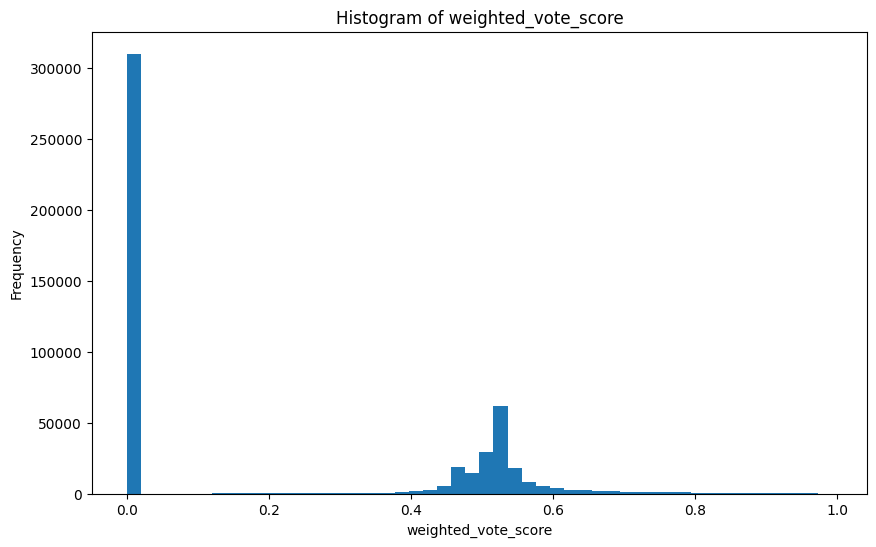

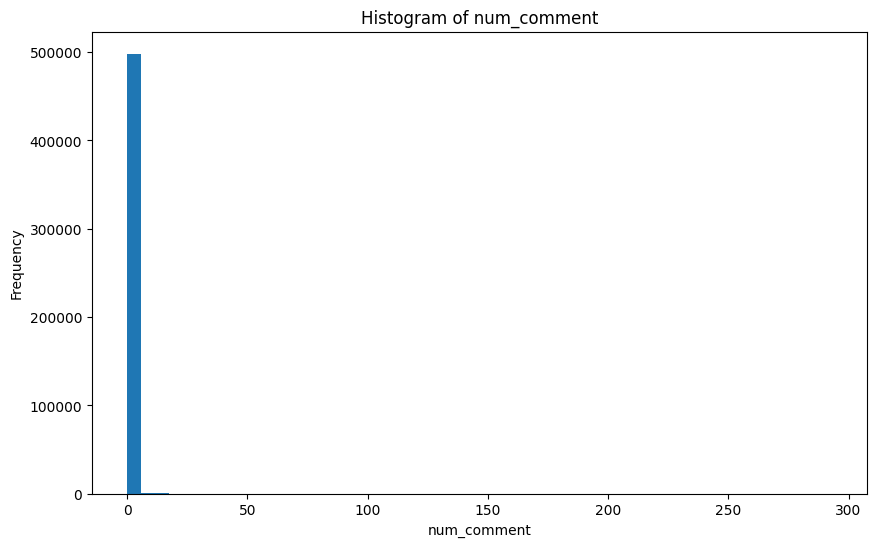

In [28]:
print("Dataset Information:")
df.info()

print("\n AUTHOR_COLUMNS: ")
print(df[AUTHOR_COLUMNS].describe(include='all'))
print("\n REVIEW_DETAILS_COLUMNS: ")
print(df[REVIEW_DETAILS_COLUMNS].describe(include='all'))
print("\n PLAYERS_RESPONSE_COLUMNS: ")
print(df[PLAYERS_RESPONSE_COLUMNS].describe(include='all'))
print("\n PURCHASE_STATE_COLUMNS: ")
print(df[PURCHASE_STATE_COLUMNS].describe(include='all'))

print(f"Number of empty reviews: {len(df[df[COL_REVIEW] == ''])}")
print(f"Number of empty reviews with one space: {len(df[df[COL_REVIEW] == ' '])}")
print(f"Number of all empty reviews: {len(df[df[COL_REVIEW].str.strip() == ''])}")

print_outliers(df, COL_AUTHOR_NUM_GAMES, threshold = 5000, should_print_samples = False)
print_outliers(df, COL_AUTHOR_NUM_REVIEWS, threshold = 2000, should_print_samples = False)
print_outliers(df, COL_AUTHOR_PLAYTIME_LIFETIME, threshold = 15000, should_print_samples = False)
print_outliers(df, COL_AUTHOR_PLAYTIME_AT_REVIEW, threshold = 5000, should_print_samples = False)

columns_to_plot = [
    COL_AUTHOR_NUM_GAMES, 
    COL_AUTHOR_NUM_REVIEWS, 
    COL_AUTHOR_PLAYTIME_LIFETIME, 
    COL_AUTHOR_PLAYTIME_AT_REVIEW,
]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[col].plot(kind='hist', bins=50, title=f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

for col in PLAYERS_RESPONSE_COLUMNS:
    plt.figure(figsize=(10, 6))
    df[col].plot(kind='hist', bins=50, title=f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

Standardization across data types and naming conventions

In [29]:
playtime_columns = [
    COL_AUTHOR_PLAYTIME_LIFETIME, 
    COL_AUTHOR_PLAYTIME_AT_REVIEW,
]

timestamp_columns = [
    COL_AUTHOR_LAST_PLAYED, 
    COL_UPDATED_AT, 
    COL_CREATED_AT,
]

# Convert minutes to hours
for col in playtime_columns:
    df[col] = df[col] / 60
    
# Convert timestamp to a readable date format
for col in timestamp_columns:
    df[col] = pd.to_datetime(df[col], unit='s')

# TODO: Convert int64 to less precise types for more efficient memory usage
df[COL_GAME_TITLE] = df[COL_GAME_TITLE].astype('category')

df[COL_IS_PURCHASED] = df[COL_IS_PURCHASED].astype('bool')
df[COL_IS_WRITTEN_DURING_EARLY_ACCESS] = df[COL_IS_WRITTEN_DURING_EARLY_ACCESS].astype('bool')
df[COL_IS_VOTED_UP] = df[COL_IS_VOTED_UP].astype('bool')
df[COL_IS_RECEIVED_FOR_FREE] = df[COL_IS_RECEIVED_FOR_FREE].astype('bool')

Handle missing or malformed data

In [30]:
# Unreasonable review dates
created_after_updated = df[COL_CREATED_AT] > df[COL_UPDATED_AT]
df = df[~created_after_updated]

# Empty reviews
empty_reviews = df[df[COL_REVIEW].str.strip() == ""]
df[COL_REVIEW] = df[COL_REVIEW].fillna("").str.strip()

# Unreasonably funny comments
unreasonably_funny_comments = df[COL_NUM_VOTES_FUNNY] > 100000
df[unreasonably_funny_comments]

# Missing playtime 
steam_release_date = pd.to_datetime("2003-09-12")
missing_values_for_last_played = df[COL_AUTHOR_LAST_PLAYED] < steam_release_date

played_the_game_missing_values = df[missing_values_for_last_played & (df[COL_AUTHOR_PLAYTIME_LIFETIME] > 0)]
never_played_the_game = df[missing_values_for_last_played & (df[COL_AUTHOR_PLAYTIME_LIFETIME] <= 0)]

df = df[~missing_values_for_last_played | (df[COL_AUTHOR_PLAYTIME_LIFETIME] <= 0)]

df.loc[never_played_the_game.index, COL_AUTHOR_LAST_PLAYED] = pd.NaT

Attribute Construction

In [31]:
COL_REVIEWS_PER_GAME = "reviews_per_game" # number of reviews player has written per game they own (supposed to show normilized user activity)
COL_REVIEW_TOTAL_ENGAGEMENT = "review_total_engagement" # number of all votes up and funny (sadly votes down are not collected)
COL_REVIEW_COMMENT_PER_ENGAGEMENT_VOTE = "review_comment_per_vote" # number of comments per vote (supposed to show normilized review comment engagement)

df[COL_REVIEWS_PER_GAME] = np.where(
    df[COL_AUTHOR_NUM_GAMES] > 0, 
    df[COL_AUTHOR_NUM_REVIEWS] / df[COL_AUTHOR_NUM_GAMES], 
    0
)

df[COL_REVIEW_TOTAL_ENGAGEMENT] = df[COL_NUM_VOTES_UP] + df[COL_NUM_VOTES_FUNNY]

df[COL_REVIEW_COMMENT_PER_ENGAGEMENT_VOTE] = np.where(
    df[COL_REVIEW_TOTAL_ENGAGEMENT] > 0, 
    df[COL_NUM_COMMENTS] / df[COL_REVIEW_TOTAL_ENGAGEMENT], 
    0
)

print("Updated DataFrame Info:")
print(df.info())

print("\nSample of New Features:")
print(df[[COL_REVIEWS_PER_GAME, COL_REVIEW_TOTAL_ENGAGEMENT, COL_REVIEW_COMMENT_PER_ENGAGEMENT_VOTE]].head())

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 499518 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   recommendation_id               499518 non-null  int64         
 1   app_id                          499518 non-null  int64         
 2   game_title                      499518 non-null  category      
 3   author_steam_id                 499518 non-null  int64         
 4   author_num_games_owned          499518 non-null  int64         
 5   author_num_reviews              499518 non-null  int64         
 6   author_playtime_lifetime        499518 non-null  float64       
 7   playtime_at_review              499518 non-null  float64       
 8   author_last_played              489183 non-null  datetime64[ns]
 9   language                        499518 non-null  object        
 10  review                          49951

Review cleaned dataset

In [32]:
print("\n AUTHOR_COLUMNS: ")
print(df[AUTHOR_COLUMNS].describe(include='all'))
print("\n REVIEW_DETAILS_COLUMNS: ")
print(df[REVIEW_DETAILS_COLUMNS].describe(include='all'))
print("\n PLAYERS_RESPONSE_COLUMNS: ")
print(df[PLAYERS_RESPONSE_COLUMNS].describe(include='all'))
print("\n PURCHASE_STATE_COLUMNS: ")
print(df[PURCHASE_STATE_COLUMNS].describe(include='all'))

print(f"Number of empty reviews: {len(df[df[COL_REVIEW] == ''])}")
print(f"Number of empty reviews with one space: {len(df[df[COL_REVIEW] == ' '])}")
print(f"Number of all empty reviews: {len(df[df[COL_REVIEW].str.strip() == ''])}")


 AUTHOR_COLUMNS: 
       author_num_games_owned  author_num_reviews  author_playtime_lifetime  \
count           499518.000000       499518.000000             499518.000000   
mean               140.592803           34.168368                418.597916   
min                  0.000000            1.000000                  0.000000   
25%                  0.000000            2.000000                  4.866667   
50%                  8.000000            5.000000                 22.466667   
75%                101.000000           17.000000                182.816667   
max              30413.000000        10441.000000              97317.000000   
std                580.270948          235.204610               1313.352135   

       playtime_at_review             author_last_played  
count       499518.000000                         489183  
mean           227.333835  2021-06-27 09:25:32.915456768  
min              0.000000            2007-02-03 08:00:00  
25%              2.616667        